## Fashion MNIST Dataset - CNN망 훈련하기

In [40]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.backend import clear_session
import numpy as np
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [22]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model

#### 데이터 적재 및 전처리

In [3]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
train_images = np.array(train_images/255.0, dtype=np.float32)
train_labels = np.array(train_labels, dtype=np.float32)
test_images = np.array(test_images/255.0, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

#### Conv2D 적용

In [5]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(4, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)

#### Pooling 적용

In [6]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(4, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = MaxPooling2D(2)(x)

In [7]:
x

<KerasTensor: shape=(None, 14, 14, 4) dtype=float32 (created by layer 'max_pooling2d')>

#### CNN 모델 생성

In [8]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)

In [9]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               1254500   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1010  

In [10]:
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint("my_keras_cnn.h5", save_best_only=True, verbose=1)
history = model.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=20, verbose=1, callbacks=[checkpoint_cb])

Epoch 1/20
375/375 [==============================] - 35s 17ms/step - loss: 0.6710 - accuracy: 0.7537 - val_loss: 0.4437 - val_accuracy: 0.8371

Epoch 00001: val_loss improved from inf to 0.44366, saving model to my_keras_cnn.h5
Epoch 2/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3808 - accuracy: 0.8624 - val_loss: 0.3861 - val_accuracy: 0.8563

Epoch 00002: val_loss improved from 0.44366 to 0.38613, saving model to my_keras_cnn.h5
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3223 - accuracy: 0.8832 - val_loss: 0.3207 - val_accuracy: 0.8832

Epoch 00003: val_loss improved from 0.38613 to 0.32074, saving model to my_keras_cnn.h5
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2897 - accuracy: 0.8939 - val_loss: 0.2918 - val_accuracy: 0.8928

Epoch 00004: val_loss improved from 0.32074 to 0.29185, saving model to my_keras_cnn.h5
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 

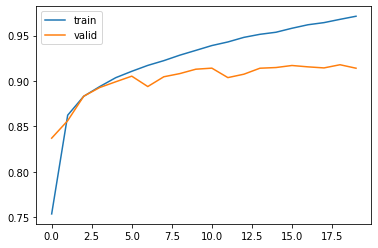

In [15]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()

In [16]:
model = load_model("my_keras_cnn.h5")
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.2658 - accuracy: 0.9067


[0.26578807830810547, 0.9067000150680542]

#### Dropout 적용

In [18]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1254

In [19]:
model.compile(optimizer=SGD(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint("my_keras_cnn.h5", save_best_only=True, verbose=1)
history = model.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=20, verbose=1, callbacks=[checkpoint_cb])

Epoch 1/20
375/375 [==============================] - 7s 17ms/step - loss: 0.6706 - accuracy: 0.7567 - val_loss: 0.4281 - val_accuracy: 0.8432

Epoch 00001: val_loss improved from inf to 0.42809, saving model to my_keras_cnn.h5
Epoch 2/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3962 - accuracy: 0.8571 - val_loss: 0.3492 - val_accuracy: 0.8752

Epoch 00002: val_loss improved from 0.42809 to 0.34923, saving model to my_keras_cnn.h5
Epoch 3/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3433 - accuracy: 0.8746 - val_loss: 0.3271 - val_accuracy: 0.8765

Epoch 00003: val_loss improved from 0.34923 to 0.32712, saving model to my_keras_cnn.h5
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.3120 - accuracy: 0.8859 - val_loss: 0.2932 - val_accuracy: 0.8935

Epoch 00004: val_loss improved from 0.32712 to 0.29319, saving model to my_keras_cnn.h5
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - loss: 0

In [20]:
model = load_model("my_keras_cnn.h5")
model.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 1s 7ms/step - loss: 0.2382 - accuracy: 0.9162


[0.23817561566829681, 0.9161999821662903]

In [21]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model2 = Model(inputs=input_tensor, outputs=output)

In [23]:
model2.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint("my_keras_cnn2.h5", save_best_only=True, verbose=1)
history = model2.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=20, verbose=1, callbacks=[checkpoint_cb])

Epoch 1/20
375/375 [==============================] - 7s 17ms/step - loss: 0.4382 - accuracy: 0.8447 - val_loss: 0.3233 - val_accuracy: 0.8861

Epoch 00001: val_loss improved from inf to 0.32334, saving model to my_keras_cnn2.h5
Epoch 2/20
375/375 [==============================] - 6s 16ms/step - loss: 0.2767 - accuracy: 0.8997 - val_loss: 0.2778 - val_accuracy: 0.9007

Epoch 00002: val_loss improved from 0.32334 to 0.27779, saving model to my_keras_cnn2.h5
Epoch 3/20
375/375 [==============================] - 6s 17ms/step - loss: 0.2210 - accuracy: 0.9193 - val_loss: 0.2404 - val_accuracy: 0.9143

Epoch 00003: val_loss improved from 0.27779 to 0.24044, saving model to my_keras_cnn2.h5
Epoch 4/20
375/375 [==============================] - 6s 16ms/step - loss: 0.1802 - accuracy: 0.9346 - val_loss: 0.2248 - val_accuracy: 0.9190

Epoch 00004: val_loss improved from 0.24044 to 0.22481, saving model to my_keras_cnn2.h5
Epoch 5/20
375/375 [==============================] - 6s 16ms/step - los

In [24]:
model2 = load_model("my_keras_cnn2.h5")
model2.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 1s 7ms/step - loss: 0.2411 - accuracy: 0.9135


[0.241088405251503, 0.9135000109672546]

In [25]:
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(100, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model2 = Model(inputs=input_tensor, outputs=output)

In [26]:
model2.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint("my_keras_cnn2.h5", save_best_only=True, verbose=1)
history = model2.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=20, verbose=1, callbacks=[checkpoint_cb])

Epoch 1/20
375/375 [==============================] - 7s 18ms/step - loss: 0.4591 - accuracy: 0.8378 - val_loss: 0.3226 - val_accuracy: 0.8850

Epoch 00001: val_loss improved from inf to 0.32256, saving model to my_keras_cnn2.h5
Epoch 2/20
375/375 [==============================] - 6s 17ms/step - loss: 0.2963 - accuracy: 0.8940 - val_loss: 0.2681 - val_accuracy: 0.9047

Epoch 00002: val_loss improved from 0.32256 to 0.26813, saving model to my_keras_cnn2.h5
Epoch 3/20
375/375 [==============================] - 6s 17ms/step - loss: 0.2486 - accuracy: 0.9088 - val_loss: 0.2377 - val_accuracy: 0.9133

Epoch 00003: val_loss improved from 0.26813 to 0.23773, saving model to my_keras_cnn2.h5
Epoch 4/20
375/375 [==============================] - 6s 17ms/step - loss: 0.2189 - accuracy: 0.9196 - val_loss: 0.2296 - val_accuracy: 0.9184

Epoch 00004: val_loss improved from 0.23773 to 0.22963, saving model to my_keras_cnn2.h5
Epoch 5/20
375/375 [==============================] - 6s 17ms/step - los

In [27]:
model2 = load_model("my_keras_cnn2.h5")
model2.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 1s 8ms/step - loss: 0.2245 - accuracy: 0.9224


[0.22454196214675903, 0.9223999977111816]

In [42]:
clear_session()
input_tensor = Input(shape=(28, 28, 1))
x = Conv2D(filters=32, kernel_size=3, strides=1, padding="same", activation="relu")(input_tensor)
x = Conv2D(filters=64, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = MaxPooling2D(2)(x)
x = Flatten()(x)
x = Dropout(rate=0.5)(x)
x = Dense(200, activation='relu')(x)
x = Dropout(rate=0.3)(x)
x = Dense(100, activation='relu')(x)
x = Dropout(rate=0.2)(x)
output = Dense(10, activation='softmax')(x)
model3 = Model(inputs=input_tensor, outputs=output)
model3.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 12544)             0         
_________________________________________________________________
dropout (Dropout)            (None, 12544)             0         
_________________________________________________________________
dense (Dense)                (None, 200)               250900

In [35]:
model3.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = ModelCheckpoint("my_keras_cnn3.h5", save_best_only=True, verbose=1)
history = model3.fit(train_images, train_oh_labels, validation_split=0.2, batch_size=128, epochs=20, verbose=1, callbacks=[checkpoint_cb])

Epoch 1/20
375/375 [==============================] - 8s 19ms/step - loss: 0.1305 - accuracy: 0.9524 - val_loss: 0.2124 - val_accuracy: 0.9287

Epoch 00001: val_loss improved from inf to 0.21236, saving model to my_keras_cnn3.h5
Epoch 2/20
375/375 [==============================] - 7s 19ms/step - loss: 0.1196 - accuracy: 0.9555 - val_loss: 0.2029 - val_accuracy: 0.9326

Epoch 00002: val_loss improved from 0.21236 to 0.20290, saving model to my_keras_cnn3.h5
Epoch 3/20
375/375 [==============================] - 7s 19ms/step - loss: 0.1098 - accuracy: 0.9592 - val_loss: 0.2028 - val_accuracy: 0.9325

Epoch 00003: val_loss improved from 0.20290 to 0.20284, saving model to my_keras_cnn3.h5
Epoch 4/20
375/375 [==============================] - 7s 19ms/step - loss: 0.1041 - accuracy: 0.9618 - val_loss: 0.2001 - val_accuracy: 0.9352

Epoch 00004: val_loss improved from 0.20284 to 0.20012, saving model to my_keras_cnn3.h5
Epoch 5/20
375/375 [==============================] - 7s 19ms/step - los

In [36]:
model3 = load_model("my_keras_cnn3.h5")
model3.evaluate(test_images, test_oh_labels, batch_size=128)

79/79 [==============================] - 1s 7ms/step - loss: 0.2254 - accuracy: 0.9315


[0.22543717920780182, 0.9315000176429749]

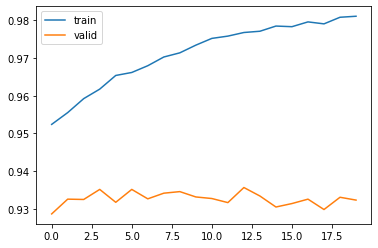

In [37]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()